In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array


2025-03-02 16:20:33.312291: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-02 16:20:33.314288: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-02 16:20:33.318548: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-02 16:20:33.328885: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740950433.345143 2833071 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740950433.35

In [2]:
mat = scipy.io.loadmat('/data1/tiany/m2m-merge-version4/output/2019/IDAI/time_interpolated/20190314-0100-moved-from-20190314-0200-event.20190314-0225.lon-p038.lat-n20-F18.mat-merged.mat.mat')

In [3]:
# print(mat.keys())
# dict_keys(['__header__', '__version__', '__globals__', 'moved'])
# Extract the image array (adjust key accordingly)
rate_struct = mat['moved']  # Replace with actual variable name

In [4]:
print(type(rate_struct))
fields = rate_struct.dtype.names
print("Fields in struct:", fields)
rate_data = rate_struct[0, 0]['rate']  # Adjust indexing based on structure shape
print("Field Data Shape:", rate_data.shape)
# clip to the center for now, 100x100
rate=rate_data[100:200, 100:200]
print("rate shape:", rate.shape, " type: ", type(rate))

<class 'numpy.ndarray'>
Fields in struct: ('rate', 'lon', 'lat')
Field Data Shape: (301, 301)
rate shape: (100, 100)  type:  <class 'numpy.ndarray'>


In [5]:
# Normalize to [0,1] if needed. !! need restore to original scale. 
rate_image = rate.astype(np.float32) / np.max(rate) 


In [6]:
# Reshape if necessary (e.g., for grayscale images)
if len(rate_image.shape) == 3:
    # Assume (height, width, channels)
    rate_image = np.expand_dims(rate_image, axis=0)  # Add batch dimension if needed
elif len(rate_image.shape) == 2:
    # Grayscale image (height, width) -> (height, width, 1)
    rate_image = np.expand_dims(rate_image, axis=-1)

# Convert to a Keras-compatible image
image = array_to_img(rate_image)
image=image.transpose(Image.FLIP_TOP_BOTTOM)


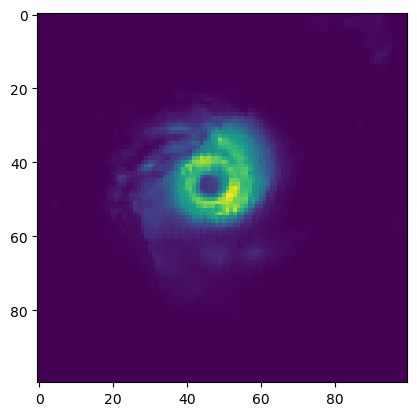

In [7]:
plt.imshow(image)

In [9]:
tmp=img_to_array(image)
tmp.shape

(100, 100, 1)

In [11]:
def test_a(x, y="test"):
  print(x, y)

test_a(2, 3)

2 3


In [12]:
test_a(2)

2 test


In [13]:
test_a()

TypeError: test_a() missing 1 required positional argument: 'x'

In [14]:
test_a(2, "b")

2 b
